First let's load our data and do a little feature engineering. Some of our quantities are in object form, so let's find their float equivalents.

In [1]:
import pandas as pd

NVDA = '/kaggle/input/nvidia-stock-price-history2024/NVIDIA Stock Price History.csv'

df = pd.read_csv(filepath_or_buffer=NVDA, parse_dates=['Date'])
df['volume'] = df['Vol.'].apply(func=lambda x: 1e6 * float(x.replace('M', '')))
df['change (pct)'] = df['Change %'].apply(func=lambda x: float(x.replace('%', '')))
df.head()

,Date,Price,Open,High,Low,Vol.,Change %,volume,change (pct)
0,2024-12-12,136.91,137.06,137.53,135.81,67.31M,-1.72%,67310000.0,-1.72
1,2024-12-11,139.31,137.36,140.17,135.21,184.91M,3.14%,184910000.0,3.14
2,2024-12-10,135.07,139.01,141.82,133.79,210.02M,-2.69%,210020000.0,-2.69
3,2024-12-09,138.81,138.97,139.95,137.13,189.31M,-2.55%,189310000.0,-2.55
4,2024-12-06,142.44,144.60,145.70,141.31,188.51M,-1.81%,188510000.0,-1.81


We almost always look at the price and volume correlations, so let's do that.

In [2]:
df[['Price', 'Open', 'High', 'Low', 'volume']].corr()

,Price,Open,High,Low,volume
Price,1.000000,0.816376,0.897553,0.918594,0.260582
Open,0.816376,1.000000,0.950579,0.877230,0.491047
High,0.897553,0.950579,1.000000,0.860287,0.516624
Low,0.918594,0.877230,0.860287,1.000000,0.115987
volume,0.260582,0.491047,0.516624,0.115987,1.000000


The fact that our interprice correlations are so low tells us right away that we don't have a lot of data, as over long periods of time our interprice correlations tend toward 1.0. How many rows of data do we have?

In [3]:
len(df)

22

Ah. We have about a month's data. Let's look at the series.

<Axes: xlabel='Date', ylabel='Price'>

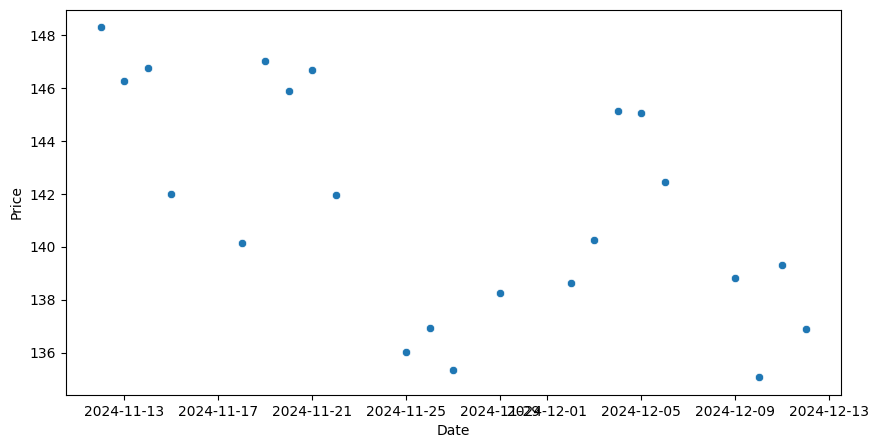

In [4]:
import matplotlib.pyplot as plt
from seaborn import scatterplot

FIGSIZE = (10, 5)
plt.figure(figsize=FIGSIZE)
scatterplot(data=df, x='Date', y='Price')

That data looks almost random. Let's look at the mean and variance.

In [5]:
df['Price'].mean(), df['Price'].std()

(141.50590909090909, 4.2855334269197725)

In [6]:
from scipy.stats import chisquare

chisquare(df['Price'].values)

Power_divergenceResult(statistic=2.725552129207579, pvalue=0.9999993715633971)

Wow. The chi-square test says our prices look random.

It looks like NVDA traded net downward over the period of interest. Over the long term we expect daily changes to be random too. What do they look like in our little dataset?

<Axes: xlabel='Date', ylabel='change (pct)'>

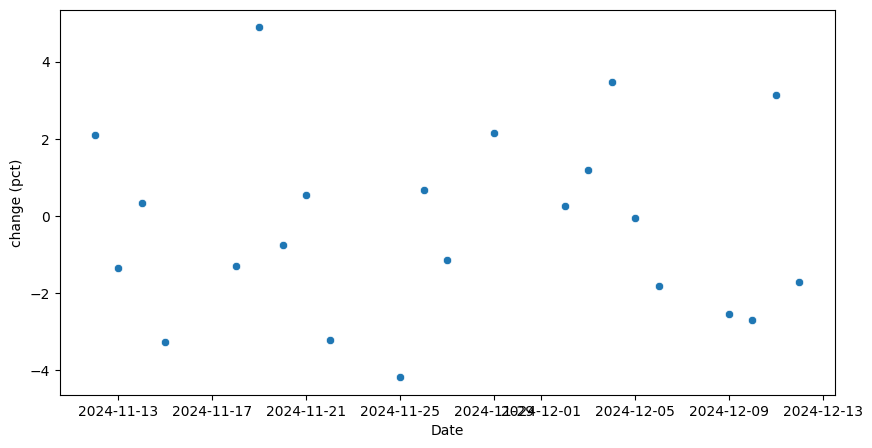

In [7]:
plt.figure(figsize=FIGSIZE)
scatterplot(data=df, x='Date', y='change (pct)')

Yes that looks pretty random.

In [8]:
df['change (pct)'].mean(), df['change (pct)'].std()

(-0.24227272727272728, 2.387776275350256)

In [9]:
chisquare(f_obs=df['change (pct)'])

Power_divergenceResult(statistic=-494.1991932457786, pvalue=1.0)

Are the daily changes more random than the prices they're based on? Who can say with only 22 obvervations.